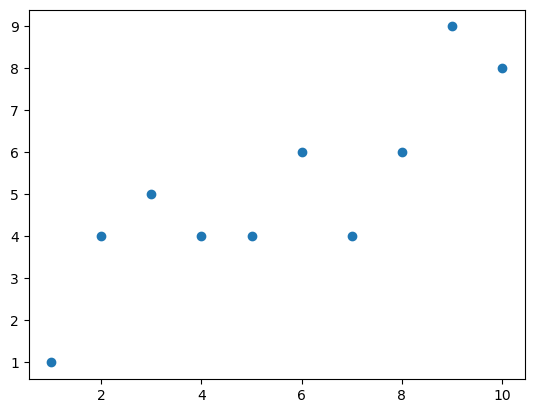

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import warnings # supress warnings
warnings.filterwarnings('ignore')

#create x,y arrays

x=np.array([1,2,3,4,5,6,7,8,9,10])
y=np.array([1,4,5,4,4,6,4,6,9,8])

#draw scatter plot
plt.scatter(x,y)

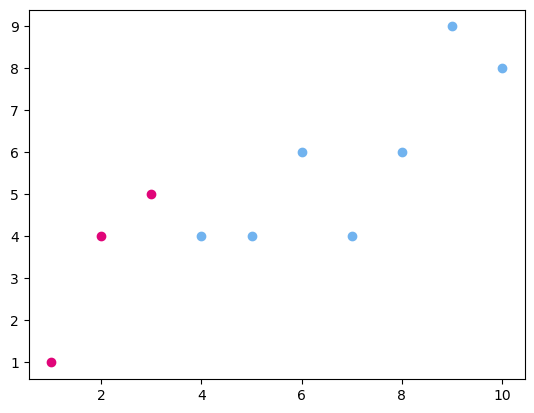

In [13]:
#array reshaping
x = x.reshape(-1,1)
y = y.reshape(-1,1)

# Train Test split 
X_train=x[0:3]
X_test=x[3:10]

Y_train=y[0:3]
Y_test=y[3:10]

#plot scatter plots of train and test data
plt.scatter(X_train,Y_train, color='#e00579')
plt.scatter(X_test,Y_test, color='#71b3ef')

a)

train score: 0.9230769230769231
test score: -16.70561941251595


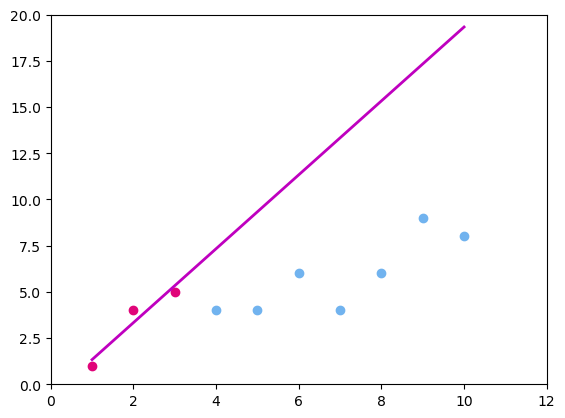

In [14]:
#train model with training data
model_train = LinearRegression()
model_train.fit(X_train,Y_train)

y_pred = model_train.predict(x)

#plot scatter plots of train and test data
plt.scatter(X_train,Y_train, color='#e00579')
plt.scatter(X_test,Y_test, color='#71b3ef')

#plot regression_line 
plt.plot(x,y_pred, color='m', linewidth=2)

#adjust x,y axis limits
plt.xlim(0, 12)
plt.ylim(0, 20)

#model scores 
train_score=model_train.score(X_train, Y_train)
print("train score:", train_score)

test_score=model_train.score(X_test, Y_test)
print("test score:",test_score)

b)+c)

Model parameters for alpha=5: [[0.57142857]]


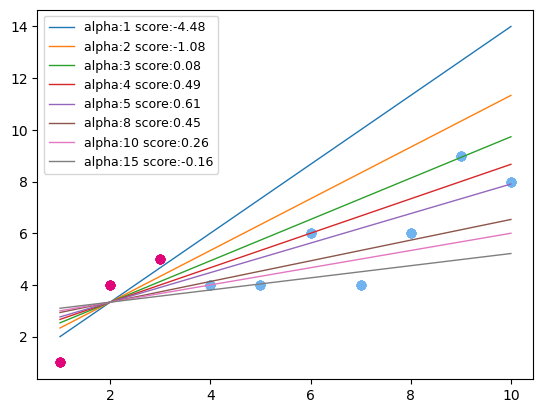

In [20]:
alphas = [1,2,3,4,5,8,10,15]
train_scores=[]
test_scores=[]

for i in alphas:  

    model_ridge = Ridge(alpha = i)
    model_ridge.fit(X_train, Y_train)
    
    # predicting y with ridge model
    Y_ridge_pred = model_ridge.predict(x)
    
    #plot scatter plots of train and test data
    plt.scatter(X_train,Y_train, color='#e00579')
    plt.scatter(X_test,Y_test, color='#71b3ef')
    
    #model scores     
    train_score=model_ridge.score(X_train, Y_train)
    test_score=model_ridge.score(X_test, Y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)
    if i == 5:
        # This is where you print the model parameters for alpha=5
        print("Model parameters for alpha=5:", model_ridge.coef_)
    # plot ridge regression line
    plt.plot(x,Y_ridge_pred, linewidth=1, label='alpha:'+str(i)+' score:'+str(round(test_score, 2)))
    
plt.legend(fontsize=9, loc='upper left')

The optimal alpha value is 5 when the model score is equal to 0.61.
Model parameters for alpha=5: [[0.57142857]]

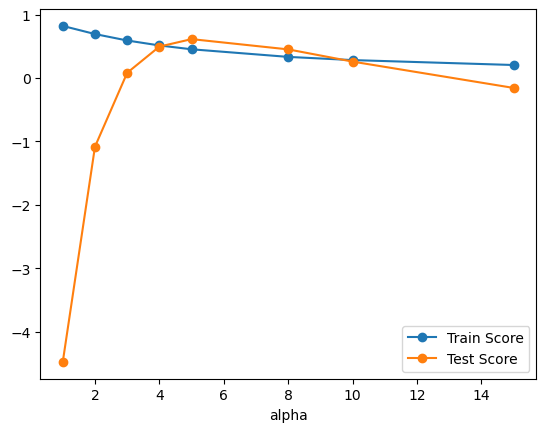

In [19]:
#plot scores for training data and test data acorss alpha values

plt.plot(alphas, train_scores, '-o', label='Train Score')
plt.plot(alphas, test_scores, '-o', label='Test Score')
plt.xlabel("alpha")
plt.legend()